In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv


In [2]:
# Im trying to build a model that takes in the name of a cast member, director and genre and predicts weather their next project is going to be a hit or a flop.

In [3]:
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv')

In [4]:
#dropping irrelevant columns
df = df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'], axis=1)

In [5]:
df.head()

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3


In [6]:
df.isnull().sum()

popularity       0
budget           0
revenue          0
cast            76
director        44
genres          23
vote_count       0
vote_average     0
dtype: int64

In [7]:
print(df['budget'].eq(0).sum(), df['revenue'].eq(0).sum())

5696 6016


In [8]:
# removing those values from the dataset where the information about budget and revenue are both absent
df = df[~(df[['budget', 'revenue']] == 0).all(axis=1)]

In [9]:
df.shape

(6165, 8)

In [10]:
print(df['budget'].eq(0).sum(), df['revenue'].eq(0).sum())

995 1315


In [11]:
df['budget'].describe()

count    6.165000e+03
mean     2.577824e+07
std      3.737512e+07
min      0.000000e+00
25%      1.700000e+06
50%      1.200000e+07
75%      3.300000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [12]:
df['revenue'].describe()

count    6.165000e+03
mean     7.018981e+07
std      1.483194e+08
min      0.000000e+00
25%      1.184830e+05
50%      1.654948e+07
75%      7.144125e+07
max      2.781506e+09
Name: revenue, dtype: float64

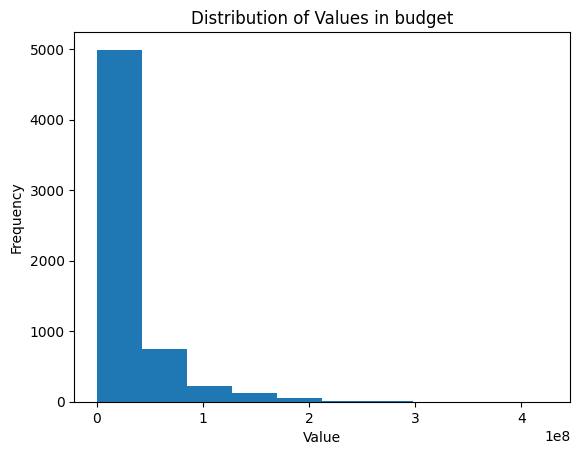

In [13]:
plt.hist(df['budget'])
plt.title('Distribution of Values in budget')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

<Axes: >

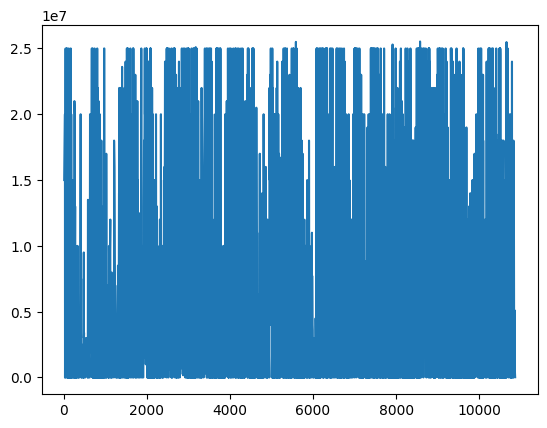

In [14]:
df[df['budget'] < 2.577824e+07]['budget'].plot.line()

In [15]:
# filling in null values for budget and revenue
# since we cannot just replace the null values with the mean of the column, we are assuming that these movies made at least as much as their budget

df['revenue'] = df.apply(lambda row: row['budget'] if row['revenue'] == 0 else row['revenue'], axis=1)
df['budget'] = df.apply(lambda row: row['revenue'] if row['budget'] == 0 else row['budget'], axis=1)


In [16]:
print(df['budget'].eq(0).sum(), df['revenue'].eq(0).sum())

0 0


In [17]:
df['profit'] = df['revenue'] / df['budget']

In [18]:
df.head()

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,10.090192
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2.522909
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2.683984
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,10.340891
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,7.927628


In [19]:
df['profit'].describe()

count    6.165000e+03
mean     1.866928e+02
std      1.300062e+04
min      2.400000e-07
25%      1.000000e+00
50%      1.000000e+00
75%      2.727273e+00
max      1.018619e+06
Name: profit, dtype: float64

In [20]:
df.loc[df['profit'] > 1.0e+06]

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average,profit
10495,0.772494,113,115103979,Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,Adventure|Drama|Action|Romance|Family,211,5.8,1.018619e+06


In [21]:
# we want to remove the erroneous outliers like this one

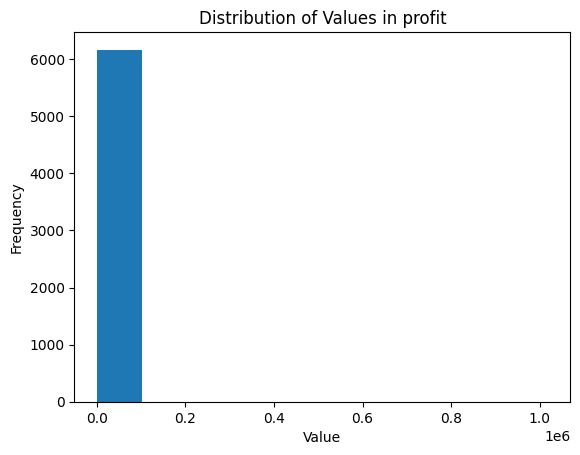

In [22]:
plt.hist(df['profit'])
plt.title('Distribution of Values in profit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

<Axes: >

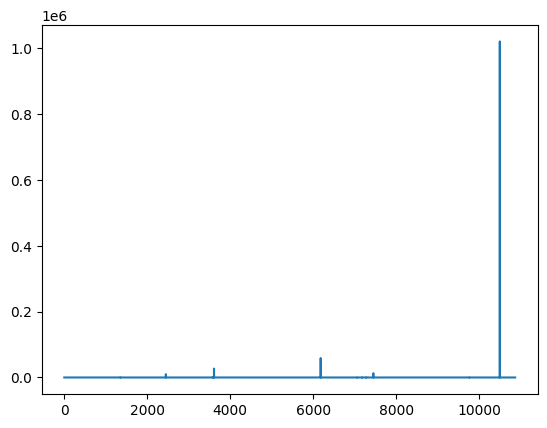

In [23]:
df['profit'].plot.line()

In [24]:
df.loc[10495, 'profit'] = 1

In [25]:
df['profit'].describe()

count    6.165000e+03
mean     2.146677e+01
std      8.489389e+02
min      2.400000e-07
25%      1.000000e+00
50%      1.000000e+00
75%      2.727273e+00
max      5.877193e+04
Name: profit, dtype: float64

In [26]:
# clipping the profit to 500 (the highest roi movie has made 5000 times its budget)
df['profit'] = df['profit'].clip(upper=500)
df = df.drop(['revenue', 'budget'], axis = 1)

In [27]:
df['profit'].describe()

count    6.165000e+03
mean     4.022804e+00
std      2.167214e+01
min      2.400000e-07
25%      1.000000e+00
50%      1.000000e+00
75%      2.727273e+00
max      5.000000e+02
Name: profit, dtype: float64

In [28]:
df.head()

,popularity,cast,director,genres,vote_count,vote_average,profit
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,10.090192
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2.522909
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2.683984
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,10.340891
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,7.927628


<Axes: >

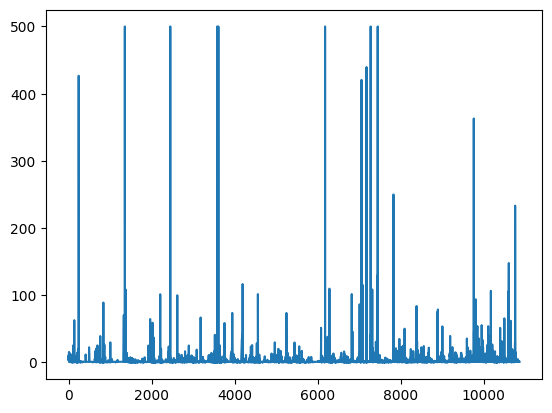

In [29]:
df['profit'].plot.line()

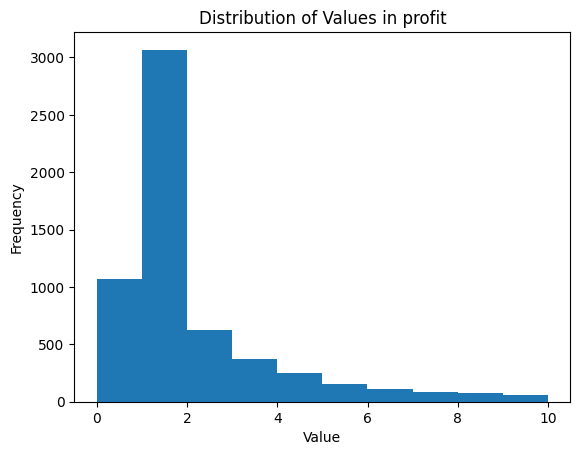

In [30]:
#df.loc[df['profit'] < 100]['profit'].plot.line()
plt.hist(df.loc[df['profit'] < 10]['profit'])
plt.title('Distribution of Values in profit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [31]:
# squishing the profit range down to (1-10)
# we are assuming that the movies that make more than 2.5x there original budget are considered a hit.
# therefore, looking at the graph, we can tell that around 4300 movies out of 6165 are flops.
# we will keep this figure in mind to classify our label.

df['profit'] = np.log10(df['profit'])

df['profit'] = (df['profit'] - df['profit'].min()) / (df['profit'].max() - df['profit'].min()) * 10

df['profit'].describe()

count    6165.000000
mean        7.255604
std         0.662759
min         0.000000
25%         7.103724
50%         7.103724
75%         7.571306
max        10.000000
Name: profit, dtype: float64

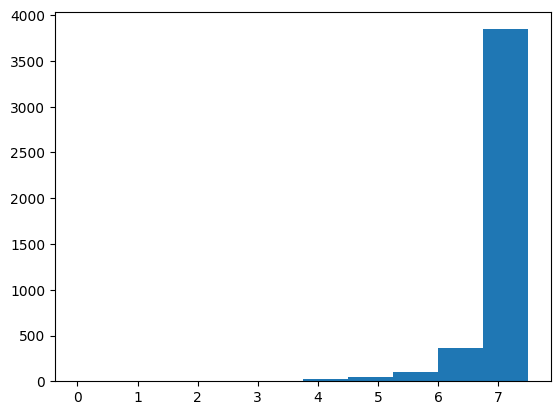

In [32]:
plt.hist(df.loc[df['profit'] < 7.5]['profit'])
plt.show()

In [33]:
# as we can observe in the histogram, our 2.5x value falls at about 7.5 in the newly created range.

In [34]:
# now we have to create a label by taking in account the popularity, vote count, vote average and the profit made by the movies.
# the most influential criteria to be considered is profit, typically, a movie must make 2.5x the original budget in order to be considered profitable.

In [35]:
correlation = df[['popularity', 'vote_count', 'profit']].corr()
print(correlation)

            popularity  vote_count    profit
popularity    1.000000    0.794867  0.260848
vote_count    0.794867    1.000000  0.291991
profit        0.260848    0.291991  1.000000


In [36]:
# as we can see, the profit and popularity columns are not correlated
# we expect this to effect the future success of a project involving the same cast and crew
# we can expect the rating of a movie to also have an impact on the future success of a project by the cast and crew

In [37]:
print(df['vote_count'].describe())
print(df['vote_average'].describe())

count    6165.000000
mean      355.901217
std       733.167342
min        10.000000
25%        31.000000
50%        96.000000
75%       324.000000
max      9767.000000
Name: vote_count, dtype: float64
count    6165.000000
mean        6.038994
std         0.872593
min         1.500000
25%         5.500000
50%         6.100000
75%         6.600000
max         8.400000
Name: vote_average, dtype: float64


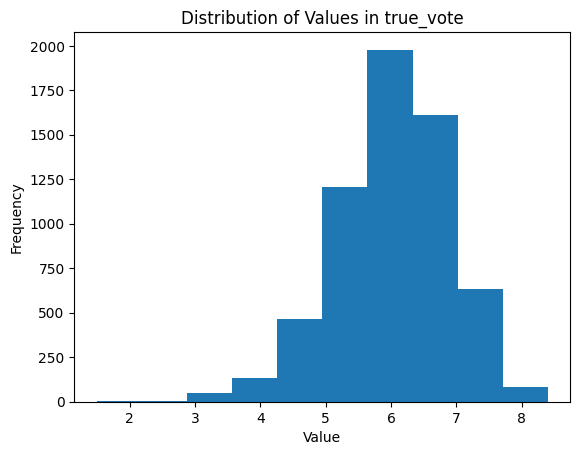

In [38]:
plt.hist(df['vote_average'])
plt.title('Distribution of Values in true_vote')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [39]:
# calculating the true rating
# we will add a reliability score to every rating on the basis of how many people actually voted for the movie
df['true_vote'] = (df['vote_average'] + (df['vote_count'] / df['vote_count'].max()))
df = df.drop(['vote_average', 'vote_count'], axis = 1)
df.head()

,popularity,cast,director,genres,profit,true_vote
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,8.181012,7.069469
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.535006,7.733255
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,7.563849,6.553916
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,8.192450,8.041825
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,8.068598,7.601730


In [40]:
df['true_vote'].describe()

count    6165.000000
mean        6.075433
std         0.900579
min         1.501536
25%         5.512491
50%         6.112798
75%         6.701331
max         8.989127
Name: true_vote, dtype: float64

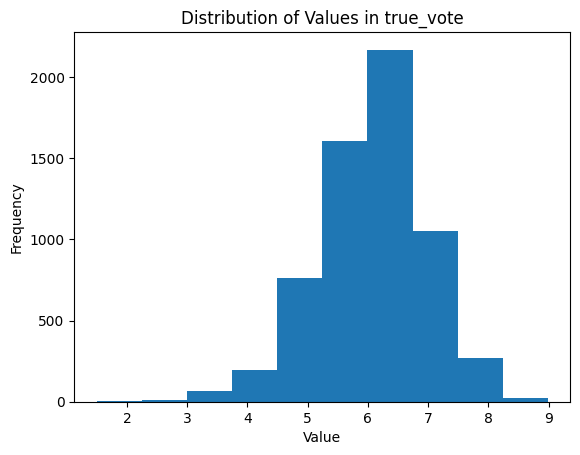

In [41]:
plt.hist(df['true_vote'])
plt.title('Distribution of Values in true_vote')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [42]:
df.head()

,popularity,cast,director,genres,profit,true_vote
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,8.181012,7.069469
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.535006,7.733255
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,7.563849,6.553916
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,8.192450,8.041825
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,8.068598,7.601730


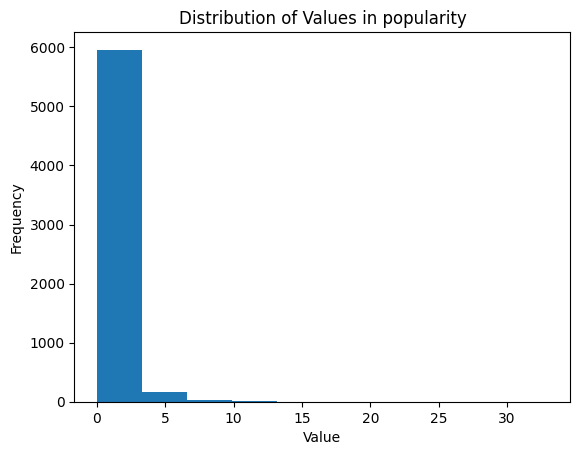

In [43]:
plt.hist(df['popularity'])
plt.title('Distribution of Values in popularity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [44]:
# squishing the popularity column down
diff = df['popularity'].max() - df['popularity'].min()
df['popularity'] = (df['popularity'] - df['popularity'].min()) / diff * 10

df.head()

,popularity,cast,director,genres,profit,true_vote
0,10.000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,8.181012,7.069469
1,8.615772,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.535006,7.733255
2,3.974998,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,7.563849,6.553916
3,3.387026,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,8.192450,8.041825
4,2.829770,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,8.068598,7.601730


In [45]:
df['popularity'].describe()

count    6165.000000
mean        0.275355
std         0.376163
min         0.000000
25%         0.097380
50%         0.172628
75%         0.318173
max        10.000000
Name: popularity, dtype: float64

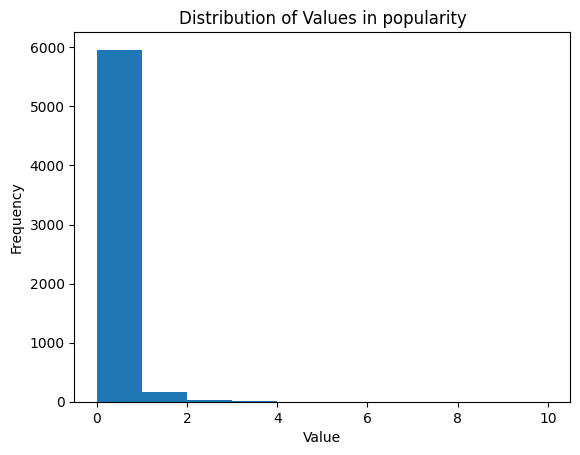

In [46]:
plt.hist(df['popularity'])
plt.title('Distribution of Values in popularity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [47]:
# now we will create our label using popularity, true_vote and investability
# assuming that profit has a weightage of 70%, and true_vote and popularity have the weightage of 10% and 20% respectively.
df['label'] = df['profit'] * 0.7 +  df['true_vote'] * 0.1 + df['popularity'] * 0.2
df = df.drop(['popularity', 'true_vote', 'profit'], axis = 1)

In [48]:
df.head()

,cast,director,genres,label
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,8.433656
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.770984
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.745086
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.216303
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,6.974146


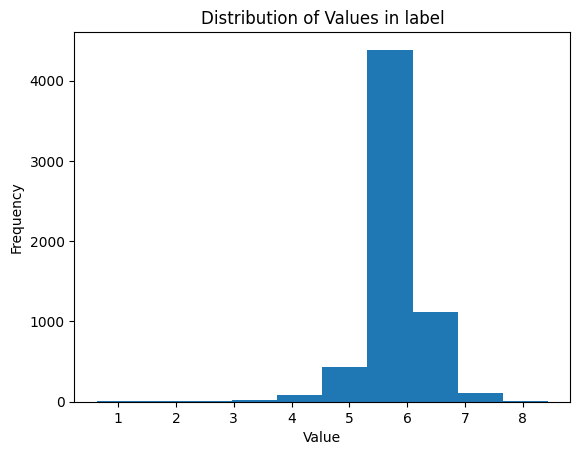

In [49]:
plt.hist(df['label'])
plt.title('Distribution of Values in label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

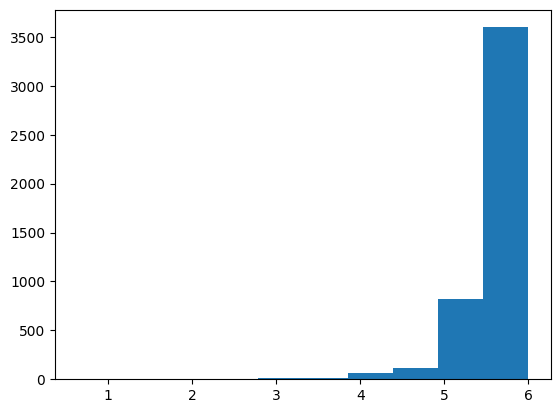

In [50]:
plt.hist(df.loc[df['label'] < 6]['label'])
plt.show()

In [51]:
# as we can see, our desired set of movies that made a profit falls at value 6 in the label.
# this will dictate how we split our class while training our model.

In [52]:
# separating the cast and genre names into individual entries
df['cast'] = df['cast'].str.split('|')
df['director'] = df['director'].str.split('|')
df['genres'] = df['genres'].str.split('|')

df = df.explode('cast').reset_index(drop=True)
df = df.explode('director').reset_index(drop=True)
df = df.explode('genres').reset_index(drop=True)

df.rename(columns={'genres': 'genre', 'cast': 'actor'}, inplace=True)

In [53]:
df.head()

,actor,director,genre,label
0,Chris Pratt,Colin Trevorrow,Action,8.433656
1,Chris Pratt,Colin Trevorrow,Adventure,8.433656
2,Chris Pratt,Colin Trevorrow,Science Fiction,8.433656
3,Chris Pratt,Colin Trevorrow,Thriller,8.433656
4,Bryce Dallas Howard,Colin Trevorrow,Action,8.433656


In [54]:
# extracting this dataframe for use in app

import pandas as pd

df.to_csv('output.csv', index=False)

In [55]:
df.shape

(86216, 4)

In [56]:
# encoding the categorical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['actor'] = le.fit_transform(df['actor'])
mapping_actor = dict(zip(le.classes_, range(len(le.classes_))))
df['director'] = le.fit_transform(df['director'])
mapping_director = dict(zip(le.classes_, range(len(le.classes_))))
df['genre'] = le.fit_transform(df['genre'])
mapping_genre = dict(zip(le.classes_, range(len(le.classes_))))

num_actor = len(mapping_actor)
num_director = len(mapping_director)
num_genre = len(mapping_genre)

# converting the continous label into a binary label

df['label'] = df['label'].apply(lambda x: 1 if x >= 6 else 0)

In [57]:
print(mapping_actor['Chris Pratt'], mapping_director['Colin Trevorrow'], mapping_genre['Action'])

1853 506 0


<Axes: >

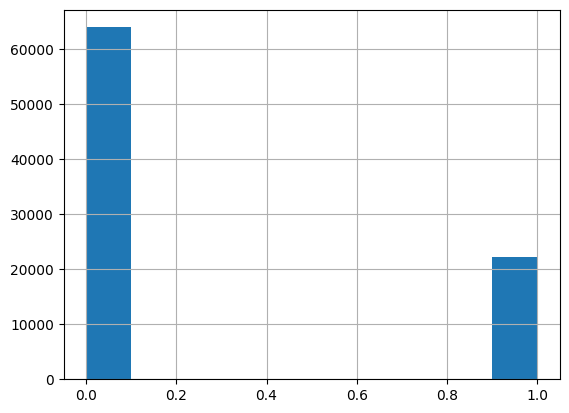

In [58]:
df['label'].hist()

In [59]:
df['label'].value_counts()

label
0    63984
1    22232
Name: count, dtype: int64

In [60]:
df.loc[df['label'] == 1]

,actor,director,genre,label
0,1853,506,0,1
1,1853,506,1,1
2,1853,506,15,1
3,1853,506,17,1
4,1444,506,0,1
...,...,...,...,...
86121,6357,95,17,1
86122,3909,95,13,1
86123,3909,95,17,1
86124,10003,95,13,1


In [61]:
print(num_actor, num_director, num_genre)

10965 2959 21


In [62]:
df.isnull().sum()

actor       0
director    0
genre       0
label       0
dtype: int64

In [63]:
# training the model

from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
X = df.drop(columns = ['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score * 100}%')

Accuracy: 74.36789607979587%


In [66]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LogisticRegression(max_iter = 1000)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

Cross-Validation Score: 74.2136030678864 (+/- 8.513468597732274e-05)


In [67]:
# outputting results

model.fit(X, y)

LogisticRegression(max_iter=1000)

In [68]:
actor_encoded = mapping_actor['Bryce Dallas Howard']
director_encoded = mapping_director['Colin Trevorrow']
genre_encoded = mapping_genre['Science Fiction']

input_features = [[actor_encoded, director_encoded, genre_encoded]]
probabilities = model.predict_proba(input_features)
probabilities

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.76153729, 0.23846271]])

In [69]:
# For the first input sample [1, 1, 1], the model predicts a probability of approximately 0.998 for class 1 and a probability of approximately 0.002 for class 0.

# Similarly, for the second input sample [1, 1, 2], the model predicts a probability of approximately 0.998 for class 1 and a probability of approximately 0.002 for class 0.